# Kiểm định Chi2

Kiểm định Chi2 được dùng để kiểm tra sự độc lập của 2 biến phân loại (categorical) hoặc sự phân bố xác suất của hai biến phân loại là tương đồng nhau.

Chú ý: Một biến (categorical) thì có nhiều level khác nhau: VD: biến giới tính thì có 2 levels là Nam hoặc Nữ.

# T-test vs Chi2-test

- Kiểm định T-test so sánh giữa 1 biến phân loại (2 levels) với biến liên tục

- Kiểm định Chi2 so sánh giữa một biến phân loại (2 levels) với biến phân loại còn lại (có nhiều levels).

# Null Hypothesis Tested

- Kiểm định tính độc lập: H0: Hai biến A, B độc lập nhau (không phụ thuộc nhau).

- Kiểm định tỉ lệ phân bố đồng đều: H0: Phân bố tỉ lệ của A và B là đồng đều nhau (không có sự khác biệt về phân bố).

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['figure.dpi'] = 100
plt.rcParams.update({'font.size': 18})

In [2]:
df = pd.read_csv('StudentsPerformance.csv')

In [3]:
df.sample(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
289,male,group E,some high school,standard,completed,77,76,77
810,male,group A,some high school,standard,none,51,31,36
93,male,group C,associate's degree,free/reduced,completed,43,45,50
232,female,group B,bachelor's degree,standard,none,67,86,83
413,male,group B,some high school,standard,completed,63,67,67
492,female,group C,some college,standard,none,83,83,90
18,male,group C,master's degree,free/reduced,completed,46,42,46
355,female,group B,bachelor's degree,standard,none,61,72,70
283,female,group D,some college,free/reduced,completed,70,78,78
250,male,group A,some high school,standard,completed,47,49,49


## Kiểm định Chi2 để kiểm tra tính độc lập của các biến Categorical. Tức biến này có tác động đến biến kia hay không?

Giả thiết thống kê có dạng

- __$H_0:$__  Biến A và Biến B độc lập với nhau
- __$H_1:$__ Hai biến trên phụ thuộc nhau. Tức kết quả biến này chịu ảnh hưởng bởi biến kia.

Chú ý: Bảng tần số đối chiếu giữa hai biến = ma trận contigency có 80% các ô với tần số >= 5.

__VD1__: Chúng ta sẽ kiểm tra xem kết quả thi môn Toán có phụ thuộc vào giới tính hay không?

- __$H_0:$__ Điểm môn Toán không phụ thuộc vào giới tính.
- __$H_1:$__ Giới tính có ảnh hưởng đến điểm môn Toán.

In [4]:
# Phân chia điểm theo thứ bậc: numerical -> categorical
#bins = pd.IntervalIndex.from_tuples([(0, 60), (60, 75), (75, 90), (90, 100)])
bins = [0, 60, 75, 85, 100]
gen_math_df = df[['gender', 'math score']].copy()
gen_math_df['ThangDiem'] = pd.cut(gen_math_df['math score'], bins, labels=['D', 'C', 'B', 'A'])
gen_math_df.sample(10)

,gender,math score,ThangDiem
889,male,44,D
151,male,77,B
277,female,59,D
7,male,40,D
162,male,49,D
744,male,55,D
969,female,75,C
174,female,43,D
912,female,52,D
194,female,69,C


In [5]:
def results(p, alpha=0.05):
    cols=['score', 'p_value', 'dof', 'KetLuan']
    if p['p_value'] < alpha:
        p['KetLuan'] = f"Chấp nhận H1 với mức ý nghĩa {alpha}"
    if p['p_value'] >= alpha:
        p['KetLuan'] = f"Chấp nhận H0 với mức ý nghĩa {alpha}"
    df = pd.DataFrame(p, index=[''])
    return df[cols]

In [6]:
tanso_df = pd.crosstab(index=gen_math_df['gender'], columns=gen_math_df['ThangDiem'])
tanso_df
# contingency table; contingency matrix; contingency data frame

ThangDiem,D,C,B,A
gender,,,,
female,204,201,75,37
male,134,186,96,66


### So sánh hai biến gender và ThangDiem:

- __$H_0:$__ Giới tính và điểm môn Toán không phụ thuộc nhau.
- __$H_1:$__ Giới tính và điểm môn Toán có mối liên hệ với nhau.

In [7]:
score, p_value, dof, expected = stats.chi2_contingency(tanso_df)

In [8]:
p ={}
p['score'] = score
p['p_value'] = p_value
p['dof'] = dof
results(p)

,score,p_value,dof,KetLuan
,24.626434,0.000018,3,Chấp nhận H1 với mức ý nghĩa 0.05


### Bài tập về nhà (phần 1):

Nghiên cứu mối liên hệ về mặt thống kê của các biến gender với điểm reading và writing (chuyển điểm về A, B, C, D);

Nghiên cứu ảnh hưởng của lunch lên điểm thi các môn math; reading và writing (chuyển điểm về A, B, C, D).

## Kỹ thuật EDA:

In [9]:
female = gen_math_df[gen_math_df['gender']=='female']
male = gen_math_df[gen_math_df['gender']=='male']

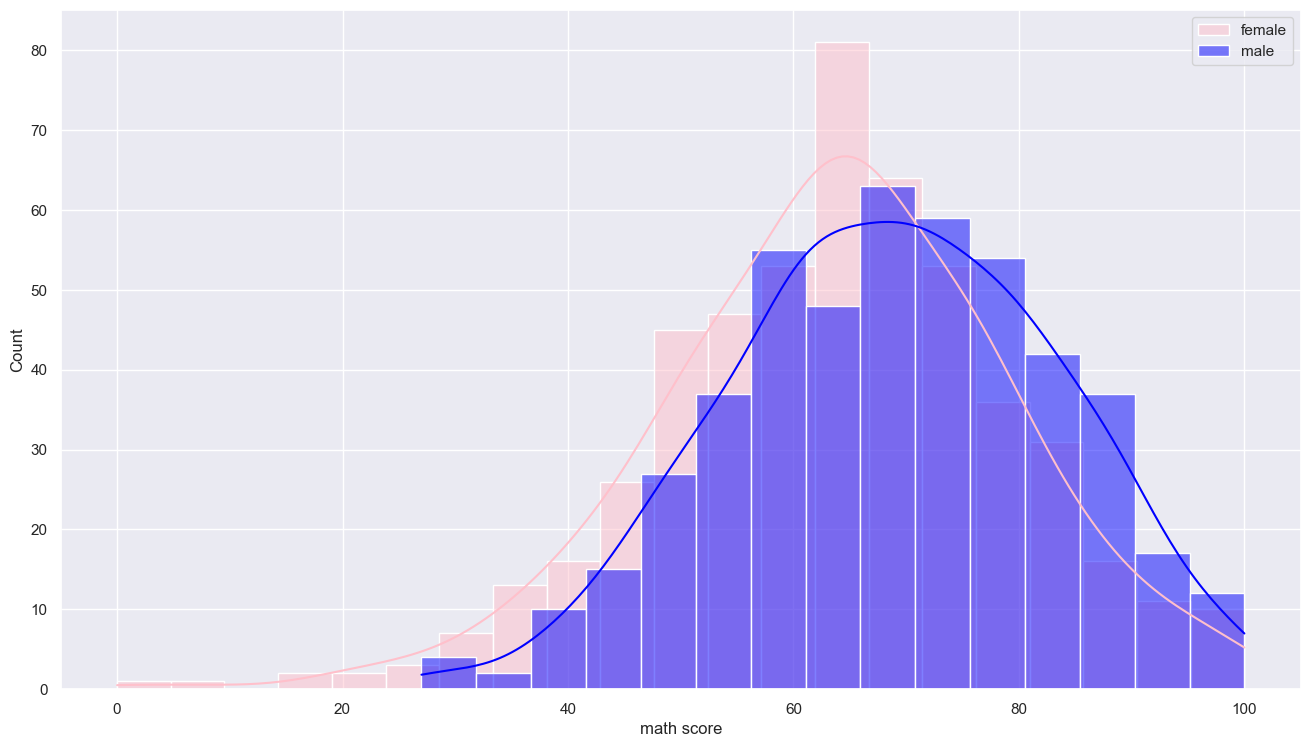

In [10]:
sns.set(style="darkgrid")
sns.histplot(data=female, x="math score", color="pink", label="female", kde=True)
sns.histplot(data=male, x="math score", color="blue", label="male", kde=True)
plt.legend()
plt.show()

In [11]:
bins = [0, 60, 75, 85, 100]
lunch_reading = df[['lunch', 'reading score']].copy()
lunch_reading['ThangDiem'] = pd.cut(lunch_reading['reading score'], bins, labels=['D', 'C', 'B', 'A'])
lunch_reading.sample(10)

,lunch,reading score,ThangDiem
67,standard,72,C
851,standard,68,C
535,free/reduced,83,B
897,free/reduced,78,B
380,standard,86,A
477,standard,68,C
772,free/reduced,67,C
42,standard,58,D
30,standard,74,C
856,free/reduced,68,C


In [12]:
tanso_df = pd.crosstab(lunch_reading['lunch'], lunch_reading['reading score'])

In [13]:
score, p_value, dof, expected = stats.chi2_contingency(tanso_df)

In [14]:
p = {}
p['score'] = score
p['p_value'] = p_value
p['dof'] = dof
results(p)

,score,p_value,dof,KetLuan
,122.103856,0.000157,71,Chấp nhận H1 với mức ý nghĩa 0.05


### Kiểm định Chi2 cho goodness of fit.

A. Null hypothesis: In Chi-Square goodness of fit test, the null hypothesis assumes that there is no significant difference between the observed and the expected value.

B. Alternative hypothesis: In Chi-Square goodness of fit test, the alternative hypothesis assumes that there is a significant difference between the observed and the expected value.

VD: Các nhà nghiên cứu Ấn Độ nghiên cứu về nguy cơ ung thư với các thói quen khác nhau. Số liệu được cho bởi

|Thói quen|Ung thư lưỡi|Ung thư miệng|Ung thư cổ họng|
|---|---|---|---|
|Nhai thuốc lá|146|267|121|
|Hút thuốc lá|71|166|102|
|Bia rượu|51|71|46|
|Không có các thói quen trên|17|12|6|

Câu hỏi: Có mối liên hệ giữa các thói quen và loại ung thư hay không?

- __$H_0:$__ Không có mối liên hệ giữa các thói quen và loại ung thư
- __$H_1:$__ Có mối liên hệ giữa thói quen và loại ung thư.

In [15]:
a = np.array([146, 267, 121, 71, 166, 102, 51, 71, 46, 17, 12, 6])

In [16]:
a = a.reshape(4, 3)
a

array([[146, 267, 121],
       [ 71, 166, 102],
       [ 51,  71,  46],
       [ 17,  12,   6]])

In [17]:
stats.chi2_contingency(a)

(20.17804103089383,
 0.0025743522535573177,
 6,
 array([[141.44052045, 256.08178439, 136.47769517],
        [ 89.79089219, 162.56877323,  86.64033457],
        [ 44.49814126,  80.56505576,  42.93680297],
        [  9.2704461 ,  16.78438662,   8.94516729]]))

__VD:__ Một chủ cửa hàng phàn nàn rằng khách của họ đến mua sắm không đồng đều trong các ngày của tuần. Một thống kê số liệu cho thấy có 50 khách vào thứ Hai, 60 khách vào thứ Ba, 40 khách và thứ Tư, 47 khách và thứ Năm và 53 khách vào thứ Sáu.

Hỏi nhận định của chủ cửa hàng có cơ sở không?

In [18]:
b = np.array([50, 60, 40, 47, 53])
stats.chisquare(b)

Power_divergenceResult(statistic=4.359999999999999, pvalue=0.3594720674366307)